<a href="https://colab.research.google.com/github/shruti629/Deep-Health-Analysis-and-Disease-Prediction/blob/main/Cardiovascular_Disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cardiovascular Disease Prediction

Data description
There are 3 types of input features:

Objective: factual information;

Examination: results of medical examination;

Subjective: information given by the patient.


Features:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Import Datasets

In [ ]:
cd=pd.read_csv("/content/drive/MyDrive/cardio.datasets.csv")
cd.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


EDA- Exploratory Data Analysis

In [ ]:
cd.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cd['age']= (cd['age'] / 365).round(2).astype('int')


<Axes: xlabel='age', ylabel='count'>

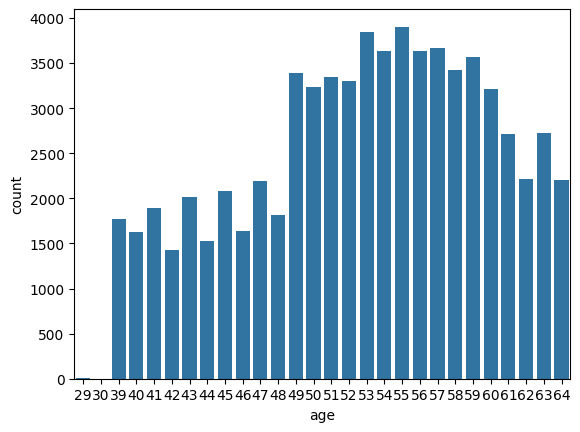

In [ ]:
sns.countplot(x='age' ,data=cd )

In [ ]:
cd['age'].head()

0    50
1    55
2    51
3    48
4    47
Name: age, dtype: int64

<Axes: xlabel='cardio'>

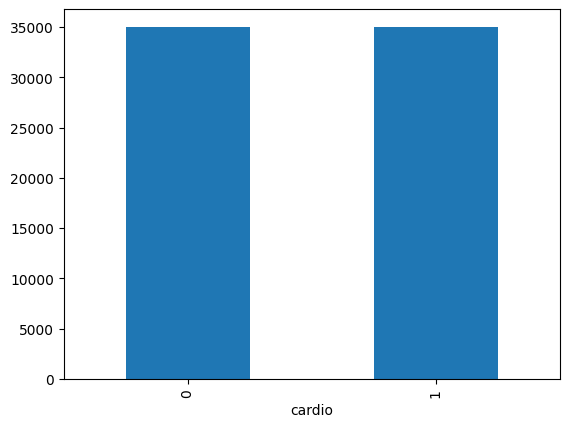

In [ ]:
cd["cardio"].value_counts().plot(kind='bar')

In [ ]:
cd['cardio'].unique()


array([0, 1])

In [ ]:
#the risk of cardio by age
mean_cardio_by_age=cd.groupby('age')['cardio'].mean()

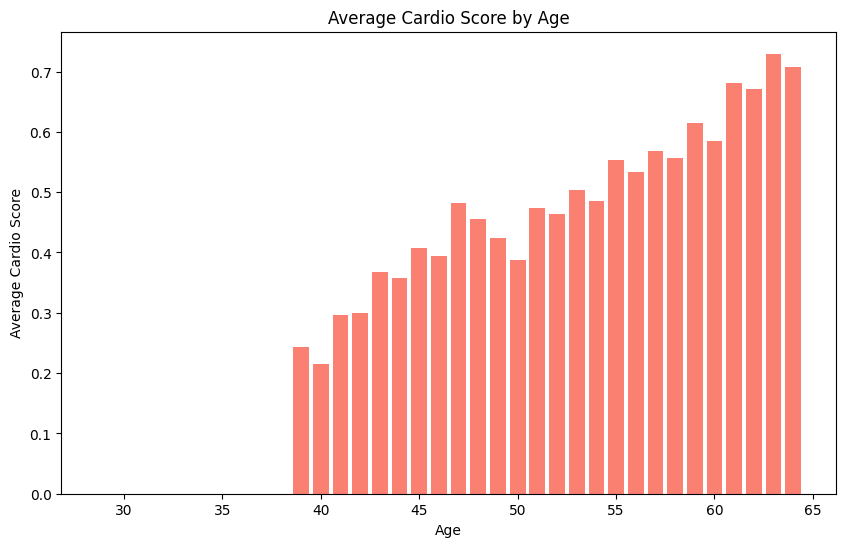

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mean_cardio_by_age.index, mean_cardio_by_age.values,color='salmon')
plt.xlabel('Age')
plt.ylabel('Average Cardio Score')
plt.title('Average Cardio Score by Age')
plt.show()

In [ ]:
#cholesterol_counts = cd['cholesterol'].value_counts()
#cholesterol_counts

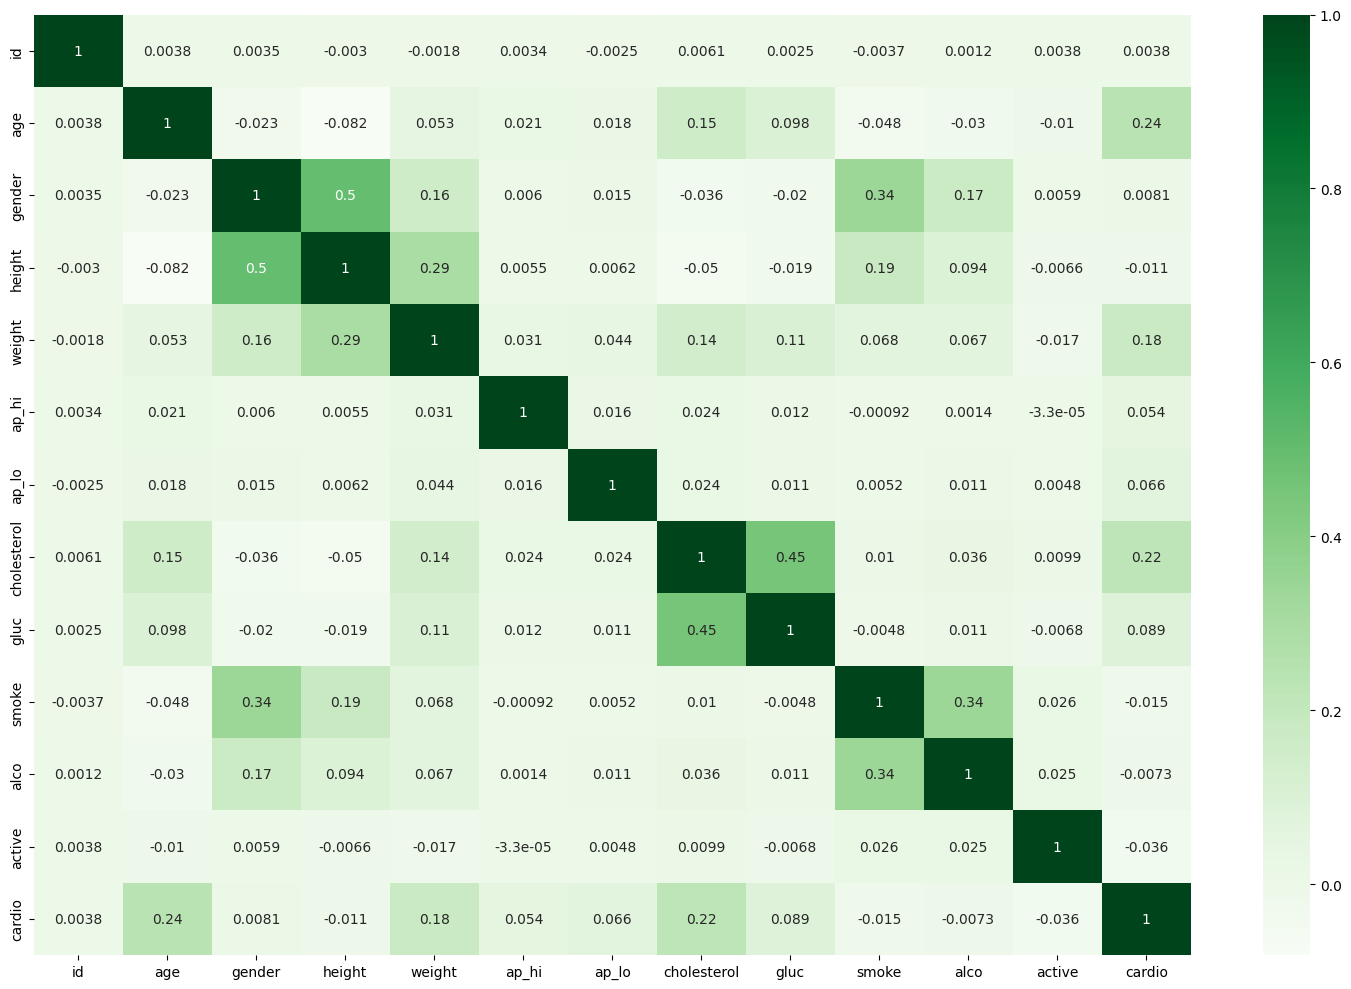

In [ ]:
plt.figure(figsize=(15, 10))
corr=cd.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Greens')
plt.tight_layout()

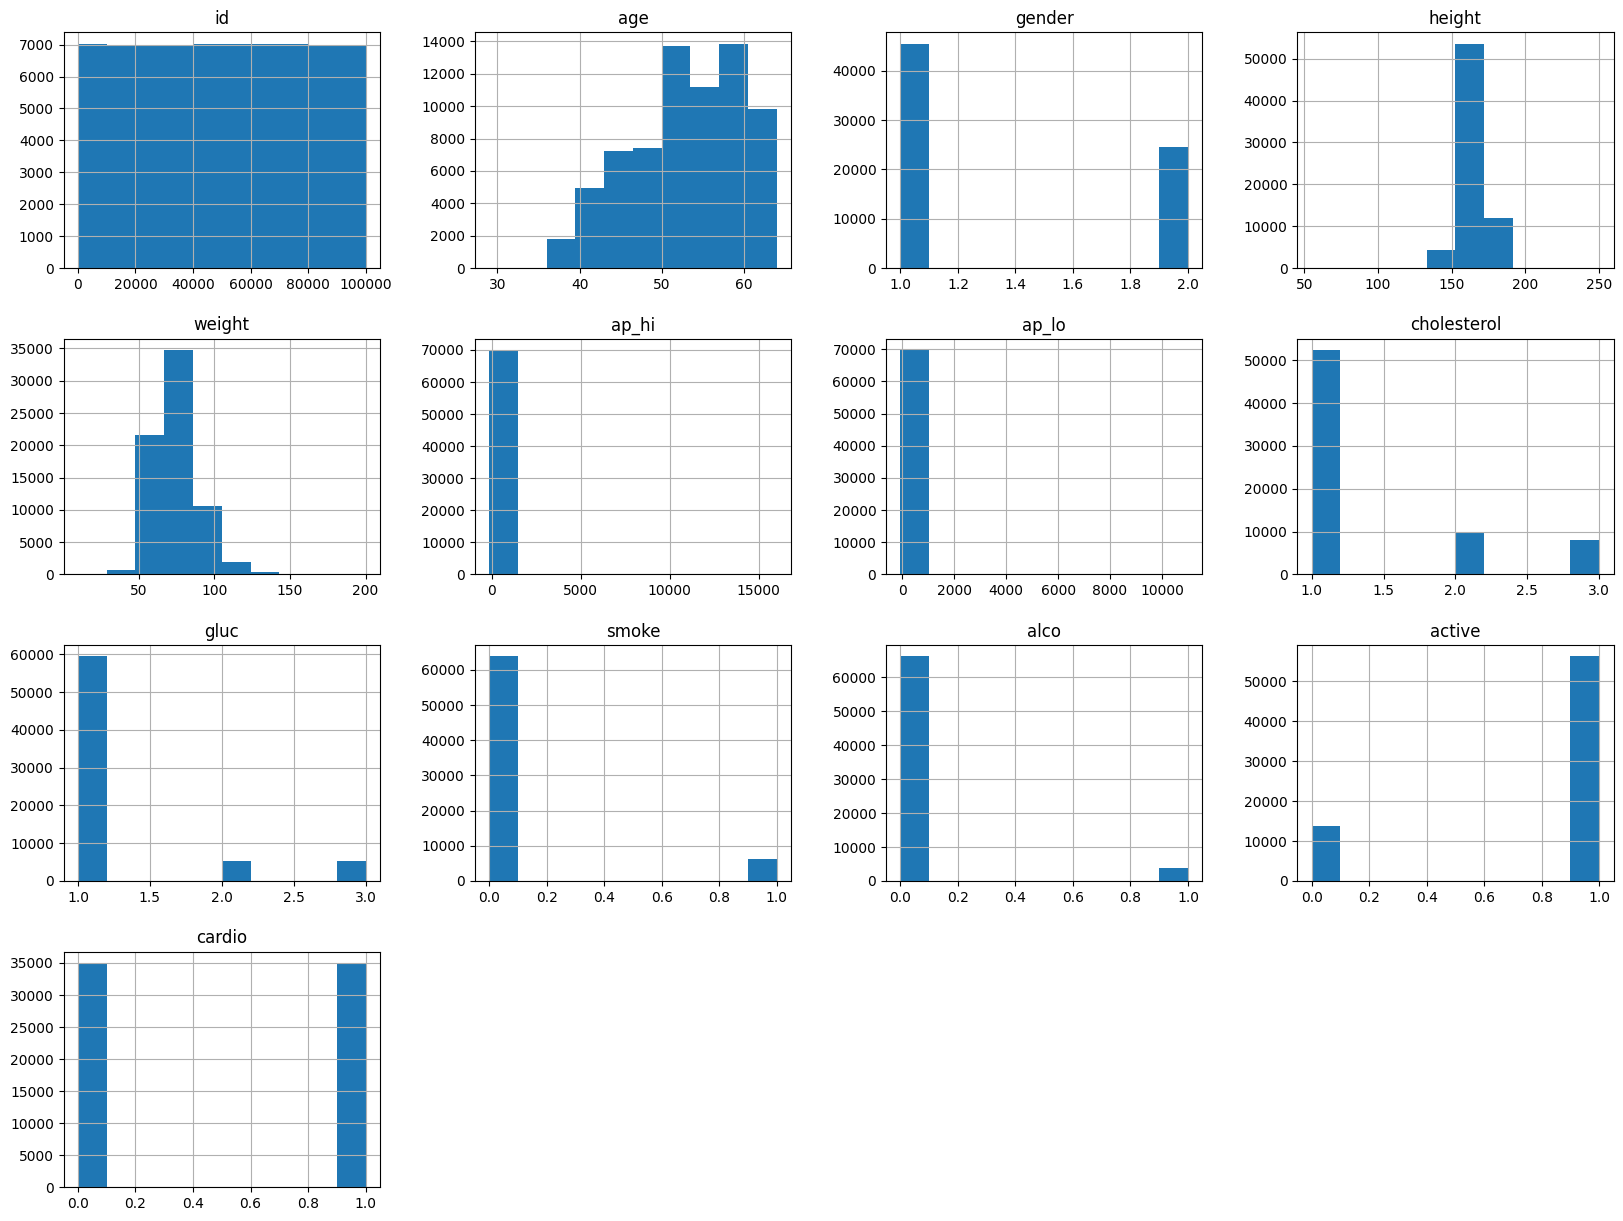

In [ ]:
cd.hist(bins=10,figsize=(20,15))
plt.show()

In [ ]:
#Independent and dependent features
x=cd.drop(columns=['id','cardio'])
y=cd['cardio']

In [ ]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1
69996,61,1,158,126.0,140,90,2,2,0,0,1
69997,52,2,183,105.0,180,90,3,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0


In [ ]:
#dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
x_train.shape,x_test.shape

((56000, 11), (14000, 11))

Logistic Regression Model

In [ ]:
log_reg= LogisticRegression(max_iter=1000)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=log_reg.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

Confusion Mertrics,Accuracy,Classification Report

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[5442, 1627],
       [2283, 4648]])

In [ ]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7207142857142858


In [ ]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      7069
           1       0.74      0.67      0.70      6931

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [ ]:
## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}



In [ ]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(x_train,y_train)

In [ ]:
clf.best_params_

{'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
clf.best_score_

0.7234464285714286

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      7069
           1       0.74      0.67      0.70      6931

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



Random Forest Classifier

In [ ]:
rand=RandomForestClassifier()
rand.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.7202142857142857

In [ ]:
#Hyperparameter tunning
parameter={
    'criterion':['gini', 'entropy', 'log_loss'],  # Use criteria suitable for classification
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':['auto','sqrt','log2']
}

rand=RandomForestClassifier()

import warnings
warnings.filterwarnings('ignore')
regressorcv=GridSearchCV(rand,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

regressorcv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='neg_mean_squared_error')

In [ ]:
regressorcv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}

In [ ]:
rand = DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='auto',splitter='best')

In [ ]:
rand.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

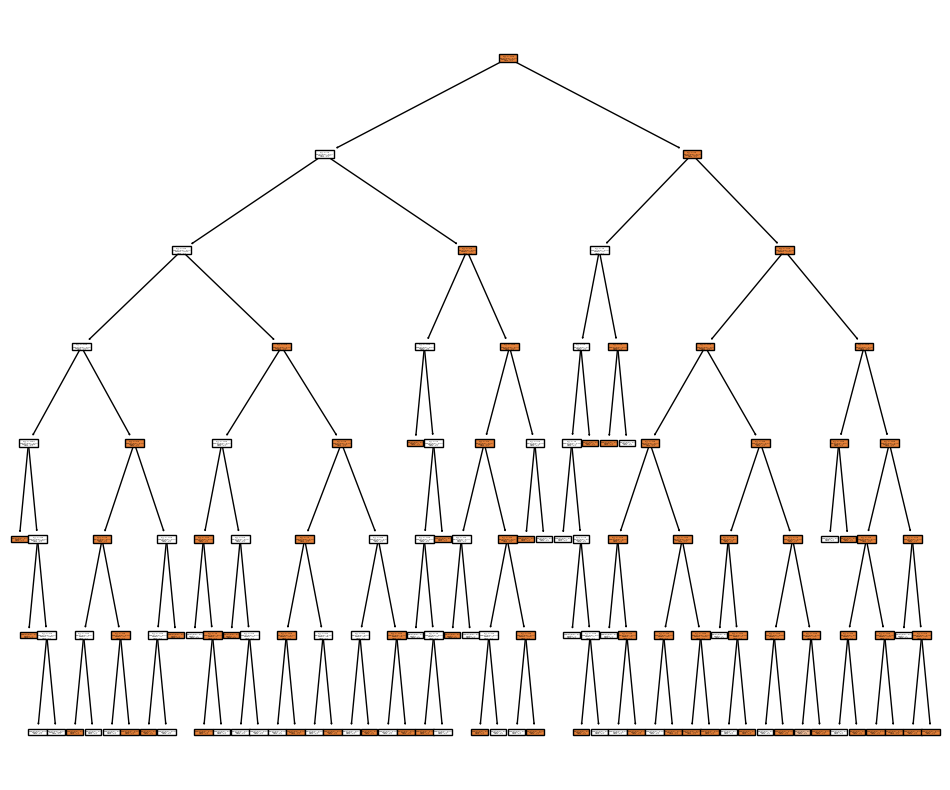

In [ ]:
plt.figure(figsize=(12,10))
tree.plot_tree(rand,filled=True)
plt.show()

In [ ]:
y_pred=regressorcv.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[5567 2225]
 [1502 4706]]
0.7337857142857143
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      7792
           1       0.68      0.76      0.72      6208

    accuracy                           0.73     14000
   macro avg       0.73      0.74      0.73     14000
weighted avg       0.74      0.73      0.73     14000



Pickling the model file for Deployment

In [ ]:
import pickle
pickle.dump(clf, open('logreg.pkl','wb'))